<a href="https://colab.research.google.com/github/rafles19/HandsOnDataScience_Newbie/blob/main/Simple_Linear_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = '/content/drive/MyDrive/Buku-Machine-Learning-main/Supervised learning/Regression/nilai.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.shape

(15, 2)

In [8]:
df.describe()

,Hours,Scores
count,15.000000,15.000000
mean,4.833333,48.066667
std,2.623429,25.327756
min,1.100000,17.000000
25%,2.950000,26.000000
50%,4.500000,42.000000
75%,6.800000,68.500000
max,9.200000,88.000000


Text(0, 0.5, 'Scores')

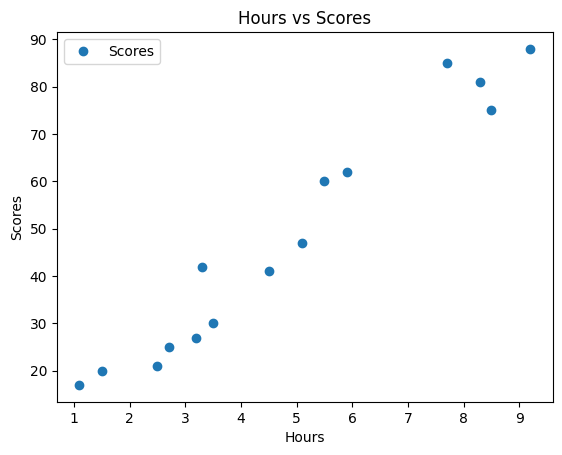

In [11]:
df.plot(x="Hours", y="Scores", style="o")
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")

*Perbandingan waktu belajar dan juga nilai yang didapatkan, semakin lama jam belajarnya maka semakin tinggi juga nilai yang didapat.*

*Dapat dilihat juga kita dapat menerka nerka bahwa plot plot x dan y seperti membentuk garis linear*

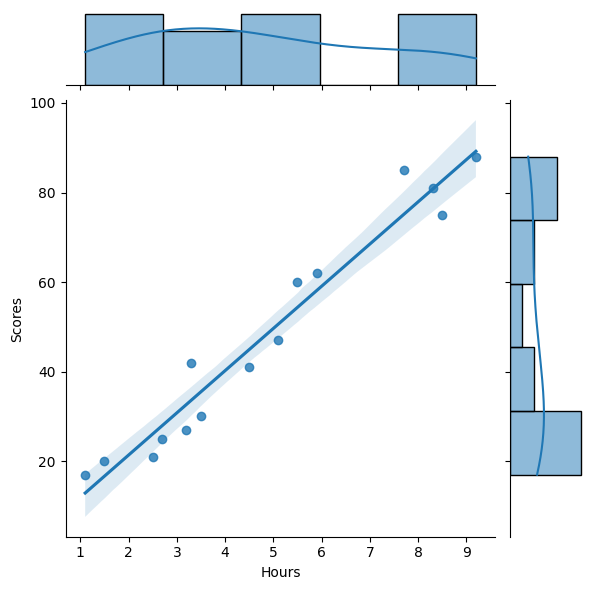

In [13]:
sns.jointplot(x=df['Hours'], y=df['Scores'], data=df, kind='reg')

In [17]:
# Karena hanya terdiri dari 2 kolom dimana Scores merupakan variable dependent dan Hours adalah Independent jadi X = Scores dan y = Hours
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
print('intercept : ', regressor.intercept_)
print('coef : ', regressor.coef_)

intercept :  2.3275200558074687
coef :  [9.56051622]


In [25]:
y_pred = regressor.predict(X_test)

In [27]:
df = pd.DataFrame({'Actual' : y_test, 'Perdicted' : y_pred})
df

,Actual,Perdicted
0,47,51.086153
1,88,90.284269
2,81,81.679805


In [30]:
from sklearn import metrics
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Square Error', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Square', metrics.r2_score(y_test, y_pred))

Mean Absolute Error 2.3500755726078375
Mean Square Error 7.458888326959005
Root Mean Square Error 2.731096542958342
R^2 Square 0.9767394334918118


Text(0.5, 1.0, 'Linear Regression')

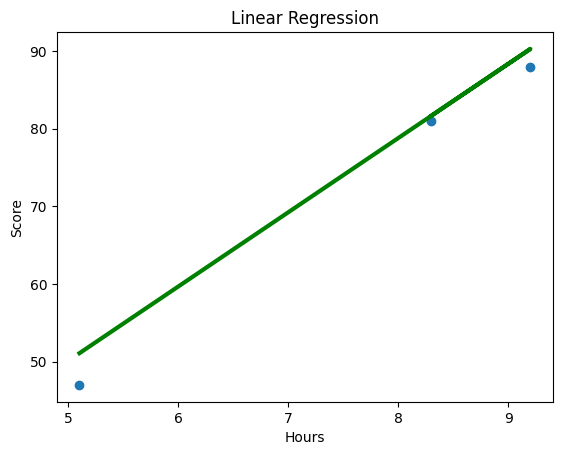

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'green', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Linear Regression')

*Garis linear merupakan data latih dan plot adalah data uji, dapat dilihat bahwa data uji tidak jauh dari garis linear dengan kata lain model sudah memprediksi dengan akurat dan baik*

Text(0, 0.5, 'Residual')

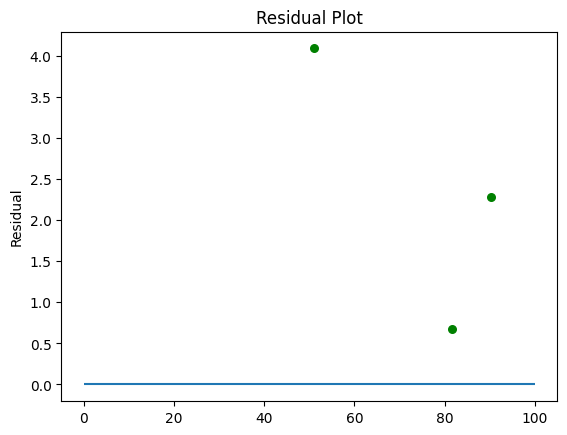

In [34]:
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c='g', s = 30)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual Plot')
plt.ylabel('Residual')

*Jika plot residual menunjukkan pola yang acak dan sebaran residual konstan, maka homoskedastisitas terpenuhi. Namun, jika plot residual menunjukkan pola sistematis yang membentuk corong atau pola tertentu, maka hal ini menunjukkan adanya heteroskedastisitas.*

*Jika ditemukan adanya heteroskedastisitas, langkah selanjutnya adalah mencari solusi untuk mengatasinya, seperti melakukan transformasi data pada variabel yang terlibat atau menggunakan metode yang lebih robust dalam analisis regresi.*

**Pada kasus diatas plot residual menunjukkan pola plot yang acak dan sebaran residual konstan maka homoskedastistas terpenuhi**